In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy import integrate
import math as m

In [7]:
def phi(q, xq, yq, X, Y):
    e0 = 8.85e-12
    Nq, Nx, Ny = len(q), len(X), len(Y)
    
    M = np.zeros((Nx, Ny))
    
    for i in range(Nx):
        for j in range(Ny):
            s = 0
            for k in range(Nq):
                s = s + q[k]/((X[i] - xq[k])**2+(Y[j] - yq[k])**2)**0.5
            
            M[i, j] = s / (4 * e0 * m.pi)
    return M 

# Потенциал диполя #

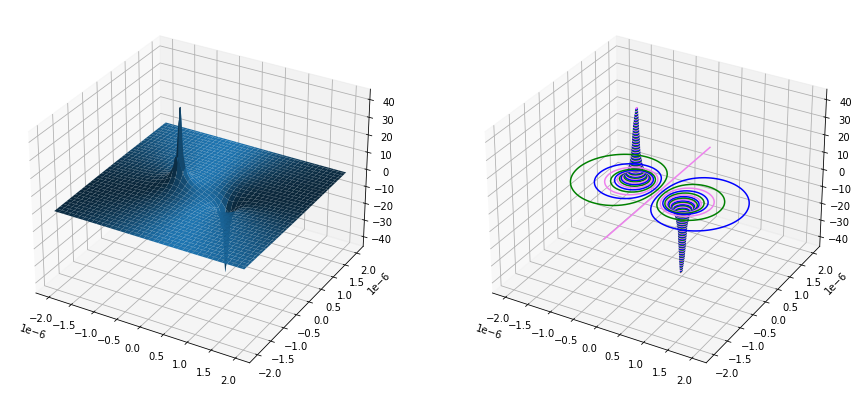

In [32]:
e = 1.6e-16
l = 1e-6
q = [e, -e]

xq = [-l/2, l/2]
yq = [0, 0]

N = 80
x_min = -2 * l
y_min = -2 * l

x_max = 2 * l
y_max = 2 * l

x = np.linspace(x_min, x_max, N)
y = np.linspace(y_min, y_max, N)
 
M = phi(q, xq, yq, x, y)
x1, y1 = np.meshgrid(x, y)
                     
fig, axs = plt.subplots(1, 2, subplot_kw=dict(projection="3d"), figsize=(15,15))
axs[0].plot_surface(y1, x1, M, linewidth=0)
axs[1].contour(y1, x1, M, 200, colors=['blue', 'violet', 'green'])

# Напряженность диполя #

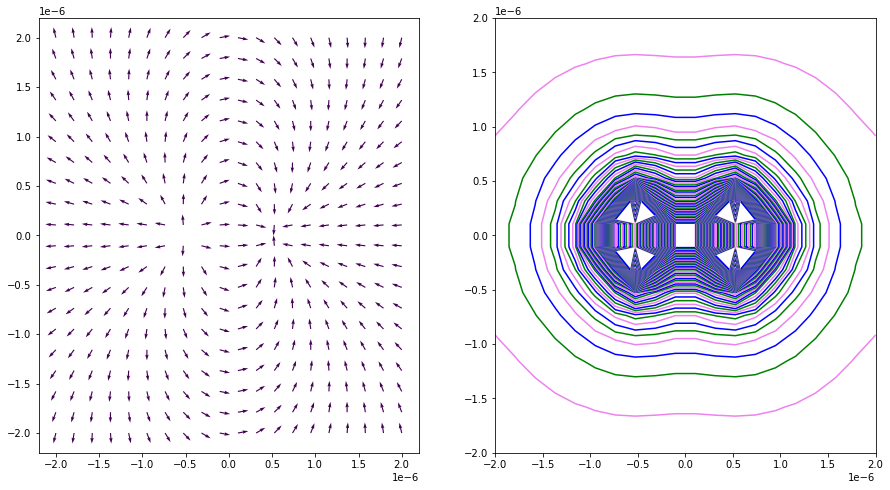

In [31]:
e = 1.6e-16
l = 1e-6
q = [e, -e]

xq = [-l/2, l/2]
yq = [0, 0]

N = 20
x_min = -2 * l
y_min = -2 * l

x_max = 2 * l
y_max = 2 * l

x = np.linspace(x_min, x_max, N)
y = np.linspace(y_min, y_max, N)
 
M = phi(q, xq, yq, x, y)
x1, y1 = np.meshgrid(x, y)

px, py = np.gradient(-M, 0.1, 0.1)
px1 = px / ((px**2 + py**2)**0.5) * 10
py1 = py / ((px**2 + py**2)**0.5) * 10

mp = (px**2 + py**2)**0.5

fig, axs = plt.subplots(1, 2, figsize=(15,8))
axs[0].quiver(y1, x1, px1, py1, 0.5)
axs[1].contour(y1, x1, mp, 100, colors=['blue', 'violet', 'green'])

# Потенциал квадроуполя #

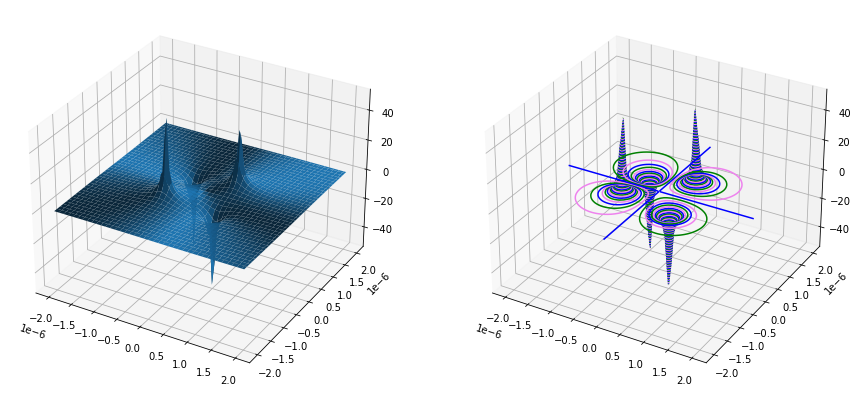

In [36]:
e = 1.6e-16
a = 1e-6
q = [e, -e, e, -e]

xq = [a/2, a/2, -a/2, -a/2]
yq = [a/2, -a/2, -a/2, a/2]

N = 80
x_min = -2 * a
y_min = -2 * a

x_max = 2 * a
y_max = 2 * a

x = np.linspace(x_min, x_max, N)
y = np.linspace(y_min, y_max, N)
 
M = phi(q, xq, yq, x, y)
x1, y1 = np.meshgrid(x, y)

fig, axs = plt.subplots(1, 2, subplot_kw=dict(projection="3d"), figsize=(15,15))
axs[0].plot_surface(y1, x1, M, linewidth=0)
axs[1].contour(y1, x1, M, 200, colors=['blue', 'violet', 'green'])

# Напряженность квадроуполя #

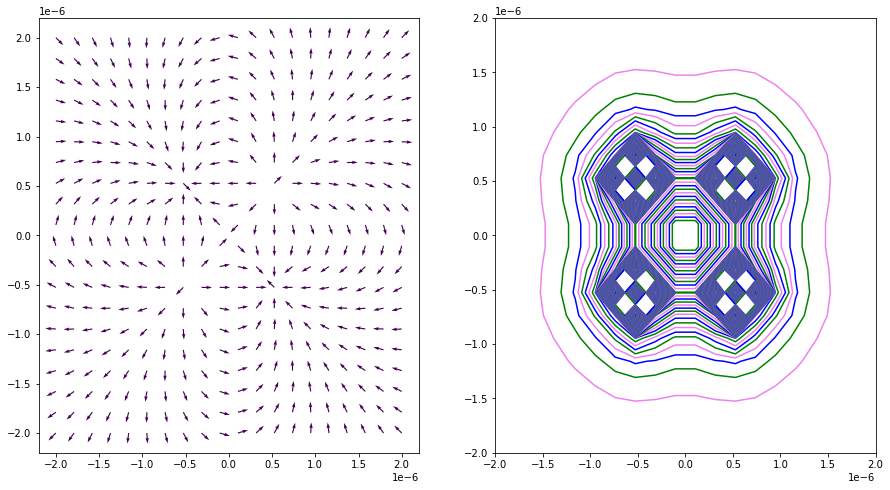

In [37]:
e = 1.6e-16
a = 1e-6
q = [e, -e, e, -e]

xq = [a/2, a/2, -a/2, -a/2]
yq = [a/2, -a/2, -a/2, a/2]

N = 20
x_min = -2 * a
y_min = -2 * a

x_max = 2 * a
y_max = 2 * a

x = np.linspace(x_min, x_max, N)
y = np.linspace(y_min, y_max, N)
 
M = phi(q, xq, yq, x, y)
x1, y1 = np.meshgrid(x, y)

px, py = np.gradient(-M, 0.1, 0.1)
px1 = px / ((px**2 + py**2)**0.5) * 10
py1 = py / ((px**2 + py**2)**0.5) * 10

mp = (px**2 + py**2)**0.5

fig, axs = plt.subplots(1, 2, figsize=(15,8))
axs[0].quiver(y1, x1, px1, py1, 0.5)
axs[1].contour(y1, x1, mp, 100, colors=['blue', 'violet', 'green'])

# Магнитное поле

In [38]:
def ring(a, y, z):
    M = np.array([0,0,1])
    Nstep = 100
    x = 0
    Ny, Nz = len(y), len(z)
    
    By = np.zeros((Ny, Nz), dtype=np.float64)
    Bz = np.zeros((Ny, Nz), dtype=np.float64)
    
    for i in range(Ny):
        for j in range(Nz):
            R = np.array([0, y[i], z[j]])
            B = 3 * np.dot(M, R.T) * R / (np.dot(R,R.T))**(5/2) - M / (np.dot(R,R.T))**(3/2)
            By[i][j] = B[1]
            Bz[i][j] = B[2]
    return (By, Bz)

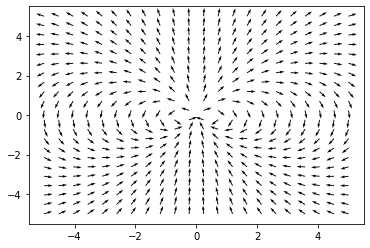

In [43]:
N = 21
y_min, z_min = -5, -5
y_max, z_max = 5, 5
y, z = [], []
for i in range(1, N + 2):
    y.append(y_min + (y_max - y_min) / N * (i-1))
    z.append(z_min + (z_max - z_min) / N * (i-1))

By, Bz = ring(1, y, z)

mp = (By**2 + Bz**2)**0.5

by = By / mp
bz = Bz / mp

y1, z1 = np.meshgrid(y, z)
plt.quiver(z1, y1, by, bz)

# Лоренц

In [44]:
H = [0, 0, 1]

def lorenz_force(t, z):
    f = np.zeros(6)
    f[0] = z[1]
    f[1] = 2*m.pi*(H[2]*z[3] - H[1]*z[5])
    f[2] = z[3]
    f[3] = -2*m.pi*(H[2]*z[1] - H[0]*z[5])
    f[4] = z[5]
    f[5] = 2*m.pi*(H[1]*z[1] - H[0]*z[3])
    
    return f

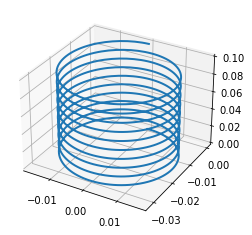

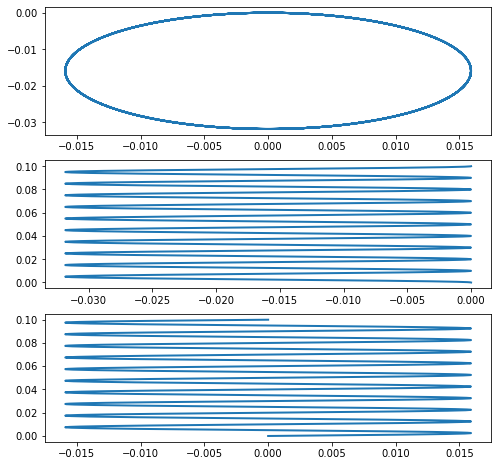

In [59]:
x0, y0, z0, vy0 = 0, 0, 0, 0
vx0 = 0.1
vz0 = 0.01

t0, t1 = 0, 10
t = np.linspace(t0, t1, 1000)

R0 = [x0, vx0, y0, vy0, z0, vz0]   
R = np.zeros((len(t), len(R0)), dtype=np.float64) 
R[0, :] = R0

r = integrate.ode(lorenz_force).set_integrator("dopri5") 
r.set_initial_value(R0, t0)

for i in range(1, t.size):
    R[i, :] = r.integrate(t[i]) 
    if not r.successful():
        raise RuntimeError("Could not integrate", projection='3d')
        
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot(R[:,0], R[:,2], R[:,4], linewidth=2)

fig, axs = plt.subplots(3, 1, figsize=(8,8))
axs[0].plot(R[:,0], R[:,2], linewidth=2)
axs[1].plot(R[:,2], R[:,4], linewidth=2)
axs[2].plot(R[:,0], R[:,4], linewidth=2)

In [60]:
r = (max(R[:,0]) - min(R[:,0])) / 2
print("R circle =", r)
print("T =",  2 * (t[np.where(R[:,0] == min(R[:,0]))[0]] - t[np.where(R[:,0] == max(R[:,0]))[0]])[0])
print("T =",  2 * m.pi * r / vx0)


R circle = 0.01591547449907247
T = 18.998998998999
T = 0.9999987552936352


In [61]:
def simulate(vz = 0.01, accuracy = 1000):
    x0 = 0
    y0 = 0
    z0 = 0

    vx0 = 0.1
    vy0 = 0
    vz0 = vz

    t0, t1 = 0, 10                   # start and end

    t = np.linspace(t0, t1, accuracy)    # the points of evaluation of solution
    R0 = [x0, vx0, y0, vy0, z0, vz0] # initial value

    #sol = integrate.odeint(lorenz_force, R0, t)
    R = np.zeros((len(t), len(R0)), dtype=np.float64) # array for solution
    R[0, :] = R0

    r = integrate.ode(lorenz_force).set_integrator("dopri5")  # choice of method
    r.set_initial_value(R0, t0)                               # initial values

    for i in range(1, t.size):
        R[i, :] = r.integrate(t[i]) # get one more value, add it to the array
        if not r.successful():
            raise RuntimeError("Could not integrate")

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot(R[:,0], R[:,2], R[:,4], linewidth=2)
    
    return R

Шаг при начальной скорости 0.01:  0.00010010010010010008
Шаг при начальной скорости 0.05:  0.0005005005005005005


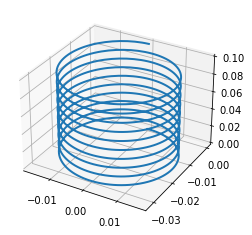

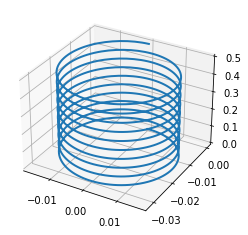

In [62]:
R1 = simulate(0.01)
R2 = simulate(0.05)

print("Шаг при начальной скорости 0.01: ", R1[:, 4][1]-R1[:, 4][0])
print("Шаг при начальной скорости 0.05: ", R2[:, 4][1]-R2[:, 4][0])

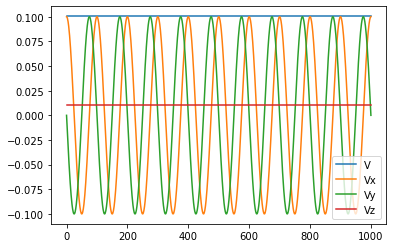

In [63]:
V = [np.sqrt(R[:, 1][i]**2 + R[:, 3][i]**2 + R[:, 5][i]**2) for i in range(len(R[:, 1]))]

plt.plot(np.linspace(0, len(V), len(V)), V, label="V")
plt.plot(np.linspace(0, len(V), len(V)), R[:, 1], label="Vx")
plt.plot(np.linspace(0, len(V), len(V)), R[:, 3], label="Vy")
plt.plot(np.linspace(0, len(V), len(V)), R[:, 5], label="Vz")

plt.legend()
plt.show()

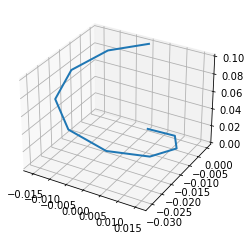

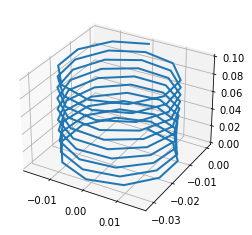

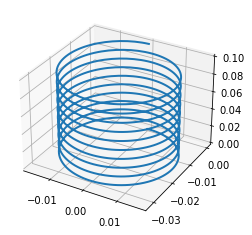

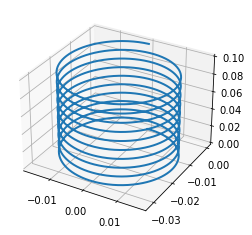

In [64]:
simulate(accuracy=10)
simulate(accuracy=100)
simulate(accuracy=1000)
a = simulate(accuracy=10000)